In [12]:
import sys

import sqlite3

import numpy as np

import pandas as pd

import seaborn as sns

from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from sklearn.cluster import KMeans

from sklearn.preprocessing import scale

from math import sqrt

import matplotlib.pyplot as plt
import sys

import sqlite3

import numpy as np

import pandas as pd

import seaborn as sns

from sklearn import preprocessing

from sklearn import tree

from sklearn import linear_model

from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

from sklearn.preprocessing import scale

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

from sklearn.metrics import make_scorer

from sklearn.grid_search import GridSearchCV

#from sklearn.cross_validation import train_test_split

from sklearn.cross_validation import ShuffleSplit

from sklearn.svm import SVC

from time import time

from math import sqrt

import matplotlib.pyplot as plt

C:\Users\jkdadhich\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\jkdadhich\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
import os
os.chdir("C:\\Users\\jkdadhich\\Desktop\\Text_Enron\\Untitled Folder\\database")
cnx = sqlite3.connect('database.sqlite')

cursor = cnx.cursor()

table_names = cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

print(cursor.fetchall())

#Read sql tables into data frames to be analyzed.

df_player_att = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)



print(df_player_att.columns)

print(df_player_att.describe().transpose())

#is any row NULL ?

print(df_player_att.isnull().any().any(), df_player_att.shape)

print(df_player_att.isnull().sum(axis=0))

[('sqlite_sequence',), ('Player_Attributes',), ('Player',), ('Match',), ('League',), ('Country',), ('Team',), ('Team_Attributes',)]
Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')
                       count           mean            std     min        25%  \
id                  183978.0   91989.500000   53110.018250     1.0   45995.2

In [4]:
rows = df_player_att.shape[0]

# Drop the NULL rows

df_player_att = df_player_att.dropna()

#Check if all NULLS are gone ?

print(rows)

print(df_player_att.isnull().any().any(), df_player_att.shape)

#How many rows with NULL values?

print(rows - df_player_att.shape[0])

#Shuffle the rows of df so we get a distributed sample when we display top few rows

df_player_att = df_player_att.reindex(np.random.permutation(df_player_att.index))

183978
False (180354, 42)
3624


In [6]:
potentialFeatures = ['acceleration', 'curve', 'free_kick_accuracy', 'ball_control', 'shot_power', 'stamina']

#prints out the correlation coefficient of “overall_rating” of a player with each feature we added to the list as potential

# check how the features are correlated with the overall ratings

for f in potentialFeatures:

    related = df_player_att['overall_rating'].corr(df_player_att[f])

    print("%s: %f" % (f,related))

#selecting the columns and creating a list with correlation coefficients, called “correlations”.

cols = ['potential',  'crossing', 'finishing', 'heading_accuracy',

       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',

       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',

       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',

       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',

       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',

       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',

       'gk_reflexes']

acceleration: 0.243998
curve: 0.357566
free_kick_accuracy: 0.349800
ball_control: 0.443991
shot_power: 0.428053
stamina: 0.325606


In [7]:

correlations = [ df_player_att['overall_rating'].corr(df_player_att[f]) for f in cols ]

In [8]:
def plot_dataframe(df_player_att, y_label):  

    color='coral'

    fig = plt.gcf()

    fig.set_size_inches(20, 12)

    plt.ylabel(y_label)

    ax = df2.correlation.plot(linewidth=3.3, color=color)

    ax.set_xticks(df2.index)

    ax.set_xticklabels(df2.attributes, rotation=75); #Notice the ; (remove it and see what happens !)

    plt.show()    

In [9]:
df2 = pd.DataFrame({'attributes': cols, 'correlation': correlations}) 

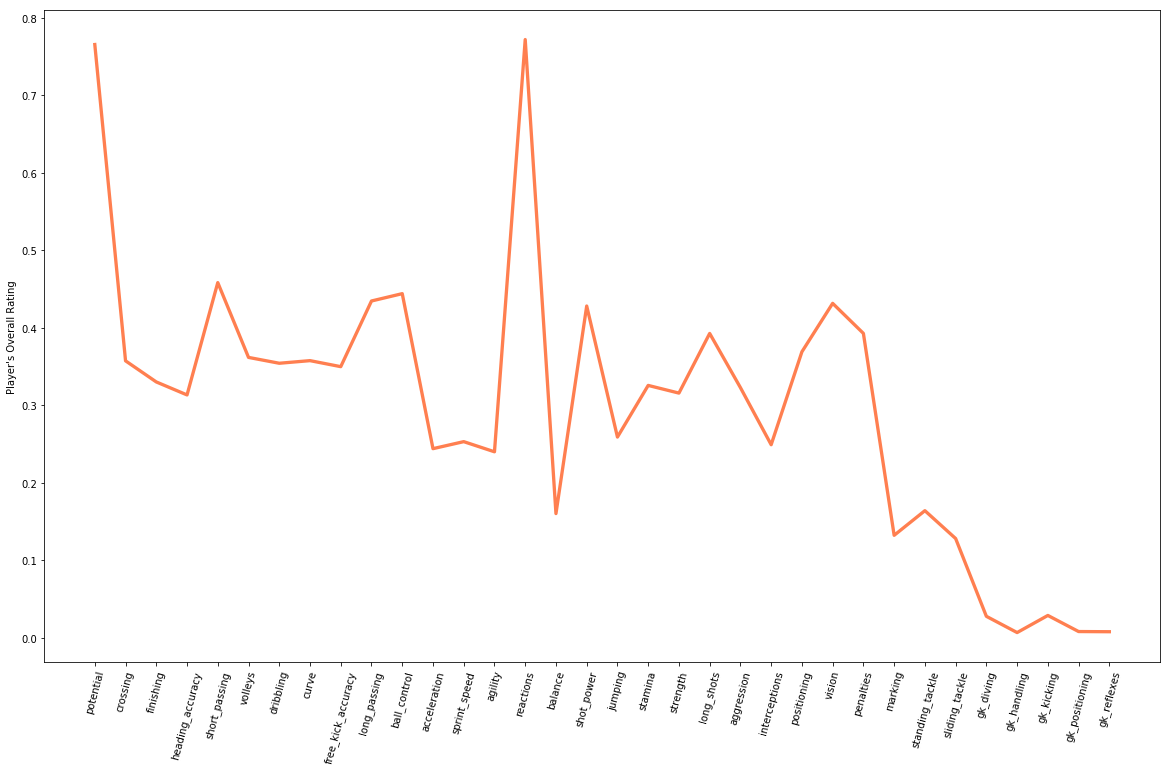

In [10]:
plot_dataframe(df2, 'Player\'s Overall Rating')

In [11]:
#--------------------------------------------------------------------------

# Part #2(b) - Player Attributes Table - Grouping Players/Kmeans Clustering

#-------------------------------------------------------------------------

# Define the features to use for grouping players

select5features = ['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']

print(select5features)

# Generate a new dataframe by selecting the features you just defined

df_select = df_player_att[select5features].copy(deep=True)

print(df_select.head())



# KMeans to cluster the values (i.e., player features on gk_kicking, potential, marking, interceptions, and standing_tackle)

# Perform scaling on the dataframe containing the features

data = scale(df_select)

# Define number of clusters

noOfClusters = 4

# Train a model

model = KMeans(init='k-means++', n_clusters=noOfClusters, n_init=20).fit(data)

print(90*'_')

print("\nCount of players in each cluster")

print(90*'_')

print(pd.value_counts(model.labels_, sort=False))

['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']
        gk_kicking  potential  marking  interceptions  standing_tackle
109184        10.0       76.0     21.0           31.0             31.0
119947         7.0       73.0     72.0           67.0             74.0
181808        13.0       75.0     48.0           41.0             51.0
179445         5.0       84.0     25.0           38.0             42.0
11091         14.0       73.0     77.0           55.0             72.0
__________________________________________________________________________________________

Count of players in each cluster
__________________________________________________________________________________________
0    50477
1    23777
2    50197
3    55903
dtype: int64


In [13]:
Player_Attributes = pd.read_sql_query("SELECT * from Player_Attributes", cnx)

In [14]:
#select relevant fields

Player_Attributes.dropna(inplace=True)

Player_Attributes.drop(['id', 'player_fifa_api_id', 'player_api_id', 'date'], axis = 1, inplace = True)

overall_rating = Player_Attributes['overall_rating']

features = Player_Attributes.drop('overall_rating', axis = 1)

features.head()



,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [15]:
# Use LabelEncoder to convert categorical data field into numerical data field



le_sex = preprocessing.LabelEncoder()



#to convert into numbers



features.preferred_foot = le_sex.fit_transform(features.preferred_foot)

features.attacking_work_rate = le_sex.fit_transform(features.attacking_work_rate)

features.defensive_work_rate = le_sex.fit_transform(features.defensive_work_rate)

features.head()



,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,71.0,1,4,14,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,71.0,1,4,14,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,66.0,1,4,14,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,65.0,1,4,14,48.0,43.0,70.0,60.0,43.0,50.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,65.0,1,4,14,48.0,43.0,70.0,60.0,43.0,50.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [16]:
# Use pandas get_dummies to convert categorical value into numerical

features = pd.get_dummies(features)



# Feature scaling using MinMaxScaler

min_max_scaler = preprocessing.MinMaxScaler()

scaled_features = min_max_scaler.fit_transform(features)



pca = PCA(n_components = 6)

pca_features = pca.fit_transform(scaled_features)



# Train and predict model on Decision tree and on SGD regressor



reg1 = tree.DecisionTreeClassifier()

reg2 = linear_model.SGDRegressor()

#reg3 = SVC(kernel='linear', C = 1.0)

In [17]:
#regs = {reg1:"Decision Tree", reg2:"SGDRegressor", reg3:"SVC"}

regs = {reg1:"Decision Tree", reg2:"SGDRegressor"}



for key in regs:

    t0 = time()

    X_train, X_test, y_train, y_test = train_test_split(scaled_features, overall_rating, test_size=0.25, random_state=0)



    print ("--------------------")

    print (regs[key])

    print ("--------------------")



    t1 = time()

    key.fit(X_train, y_train)

    print ("Time taken to train the model: {}".format(time()-t1))



    t2 = time()

    pred_test = key.predict(X_test)

    pred_train = key.predict(X_train)

    print ("Time taken to predict the model: {}".format(time()-t2))



    t3 = time()

    print ("r2 score of this model on testing set is: {}".format(r2_score(y_test, pred_test)))

    print ("r2 score of this model on training set is: {}".format(r2_score(y_train, pred_train)))

--------------------
Decision Tree
--------------------
Time taken to train the model: 4.169646263122559
Time taken to predict the model: 0.12994647026062012
r2 score of this model on testing set is: 0.948895316732647
r2 score of this model on training set is: 0.9988644730721816
--------------------
SGDRegressor
--------------------
Time taken to train the model: 0.18993043899536133


C:\Users\jkdadhich\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Time taken to predict the model: 0.011994123458862305
r2 score of this model on testing set is: 0.8371412013993145
r2 score of this model on training set is: 0.8386816662436773


In [18]:
def fit_model(X, y):

    """ Performs grid search over the 'max_depth' parameter for a 

        decision tree regressor trained on the input data [X, y]. """

    

    # Create cross-validation sets from the training data

    

    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)



    # TODO: Create a decision tree regressor object

       

    regressor1 = DecisionTreeRegressor()

    regressor2 = linear_model.SGDRegressor()

    #regressor3 = SVC()



    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10

    tree_params = {'max_depth' : [3, 6, 9, 20, 100], 'min_samples_split':[2, 3, 4, 5]}

    sgd_params = {'loss':['squared_loss', 'huber'], 'penalty': ['none', 'l2', 'l1', 'elasticnet'], 'n_iter':[10, 75, 100, 500]}

   #svm_params = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]},{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}

    

    

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 

    scoring_fnc = make_scorer(performance_metric)



    # Updated cv_sets and scoring parameter

    grid = GridSearchCV(regressor1, tree_params, scoring = scoring_fnc, cv = cv_sets)



    # Fit the grid search object to the data to compute the optimal model

    #print("grid fit")

    grid = grid.fit(X, y)



    # Updated cv_sets and scoring parameter

    #grid = GridSearchCV(regressor2, sgd_params, scoring = scoring_fnc, cv = cv_sets)



    # Fit the grid search object to the data to compute the optimal model

    #grid = grid.fit(X, y)



    # Return the optimal model after fitting the data

    return grid.best_estimator_

In [19]:
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

In [21]:
print("Script Start")

t0 = time()

grid_reg = fit_model(pca_features, overall_rating)

print (grid_reg.score)

# grid_pred = grid_reg()

print ("Time taken to train and predict using GridSearch: {}".format(time() - t0))

print ("Best parameters are: {}".format(grid_reg.get_params()))

Script Start
<bound method RegressorMixin.score of DecisionTreeRegressor(criterion='mse', max_depth=100, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')>
Time taken to train and predict using GridSearch: 180.60309314727783
Best parameters are: {'criterion': 'mse', 'max_depth': 100, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}
